In [207]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from heapq import *

In [208]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(data_home='D:\Senior II\Image Processing\Project\LFW Dataset',
min_faces_per_person = 40, resize = 0.4)


In [209]:
# introspect the images arrays to find the shapes (for plotting)
m, h, w = lfw_people.images.shape
images = lfw_people.images

# Instead of providing 2D data, X has data already in the form of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Examples: % d" % m)
print("Number of features: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Examples:  1867
Number of features:  1850
Number of Class Labels:  19


Gerhard Schroeder


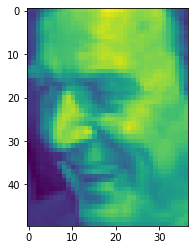

In [210]:
#View an image
index = int(random.random() * images.shape[0])
# index = 0
name = target_names[y[index]]
print(name)
plt.imshow(images[index,:,:])
plt.show()

In [211]:
#Flatten images array
flattened_images = images.reshape(m, -1).T
# N^2 * M
print(f'Shape after flattening: {flattened_images.shape}')

Shape after flattening: (1850, 1867)


In [212]:
# A is the matrix of averaged images
average = np.average(flattened_images, axis = 1, keepdims = True).squeeze()
A = (flattened_images - np.average(flattened_images, axis = 1, keepdims = True))
#n*m
print(A.shape)

(1850, 1867)


In [213]:
cov = np.matmul(A.T, A)
#m*m
print(f'Covariance Matrix Shape: {cov.shape}')

Covariance Matrix Shape: (1867, 1867)


In [214]:
#eigenvectors are stacked in columns
eigenvalues, v = np.linalg.eig(cov)
print(f'Shape of eigenvalues: {eigenvalues.shape}')
print(f'Shape of eigenvectors: {v.shape}')

Shape of eigenvalues: (1867,)
Shape of eigenvectors: (1867, 1867)


In [215]:
u = np.matmul(A, v)
print(u.shape)

(1850, 1867)


In [216]:
#change choice of K
K = n_features
indices = np.argpartition(eigenvalues, -K)[-K:]
# #use indices to get the top K eigenvectors
X = u[:, indices]
X_inv = np.linalg.inv(X)
w = np.zeros((K, m))
for j in range(K):
    w[:,j] = np.matmul(X_inv, A[:, j])
    
print(type(w))

<class 'numpy.ndarray'>


In [217]:
index = int(random.random() * images.shape[0])
#take on image from A randomly
image = A[:, index]
#project image onto w
projection = np.matmul(w.T, image)
#reconstruct image
reconstructed_image = np.matmul(w, projection) + average
#reshape image
reconstructed_image = reconstructed_image.reshape(h, w)
#plot image
plt.imshow(reconstructed_image)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index